In [8]:
from sqlalchemy import create_engine
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
with open ('Query.sql','r', encoding='utf-8') as Archivo_sql:
    Query = Archivo_sql.read()

with open ('credenciales.json', 'r', encoding = 'utf-8') as Archivo_credenciales:
    credenciales = json.load(Archivo_credenciales)

connection_string = f'mssql+pyodbc://{credenciales['username']}:{credenciales['password']}@{credenciales['server']}/{credenciales['database']}?driver=ODBC+Driver+17+for+SQL+Server'

In [10]:
try:
    engine = create_engine(connection_string)
    df = pd.read_sql(Query, engine)
except NameError as e:
    print(e)
finally:
    engine.dispose()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3862 entries, 0 to 3861
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Anho                3862 non-null   int64  
 1   Mes                 3862 non-null   int64  
 2   Nombre_Producto     3862 non-null   object 
 3   TotalVentas         3862 non-null   float64
 4   CantidadProductos   3862 non-null   int64  
 5   Ranking             3862 non-null   int64  
 6   ParticipacionAnual  3862 non-null   float64
 7   TotalCantidadAhno   3862 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 241.5+ KB


In [12]:
df["Anho"] = df["Anho"].astype('uint16')
df["Mes"] = df["Mes"].astype('uint8')
df["CantidadProductos"] = df["CantidadProductos"].astype('uint32')
df["TotalCantidadAhno"] = df["TotalCantidadAhno"].astype('uint32')
df["Ranking"] = df["Ranking"].astype('uint16')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3862 entries, 0 to 3861
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Anho                3862 non-null   uint16 
 1   Mes                 3862 non-null   uint8  
 2   Nombre_Producto     3862 non-null   object 
 3   TotalVentas         3862 non-null   float64
 4   CantidadProductos   3862 non-null   uint32 
 5   Ranking             3862 non-null   uint16 
 6   ParticipacionAnual  3862 non-null   float64
 7   TotalCantidadAhno   3862 non-null   uint32 
dtypes: float64(2), object(1), uint16(2), uint32(2), uint8(1)
memory usage: 139.7+ KB


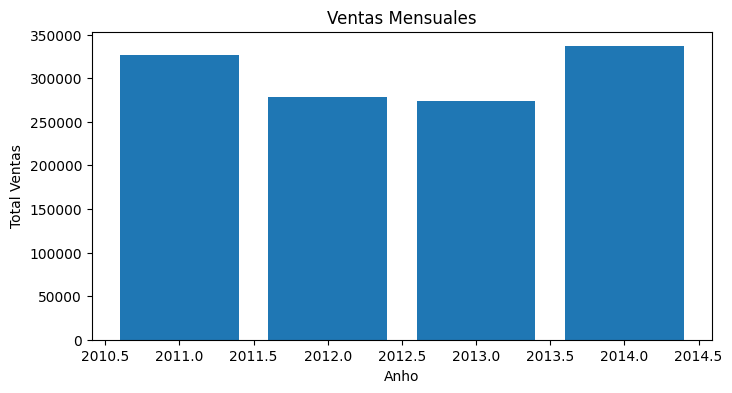

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(df["Anho"],df["TotalVentas"])
ax.set_xlabel("Anho")
ax.set_ylabel("Total Ventas")
ax.set_title("Ventas Mensuales")
#plt.xticks(range(1, 13))
plt.show()

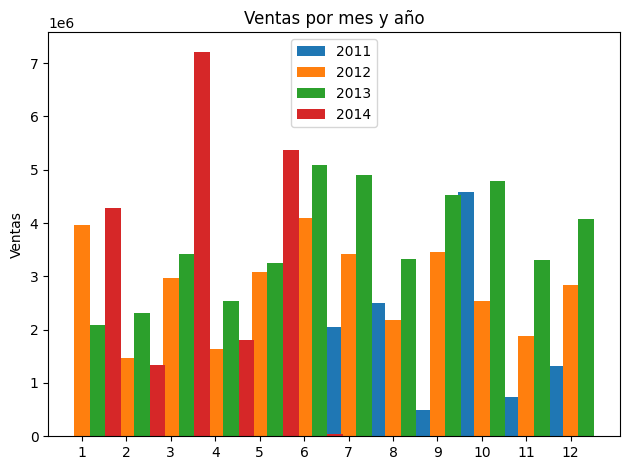

In [16]:

df_agrupado = df.groupby(['Anho', 'Mes']).agg({'TotalVentas':'sum'}).reset_index()
ahnos = df_agrupado['Anho'].unique()
meses = np.arange(1, 13)
combinaciones = pd.DataFrame([(anho, mes) for anho in ahnos for mes in meses], columns=['Anho', 'Mes'])

df_agrupado = pd.merge(
    right=combinaciones,
    left=df_agrupado,
    how='right',
    on = ['Mes','Anho'],

)

df_agrupado['TotalVentas'].fillna(0)

width = 0.35

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Barra para cada año
for i, anho in enumerate([2011, 2012, 2013, 2014]):
    ventas_anho = df_agrupado[df_agrupado['Anho'] == anho]['TotalVentas']
    ax.bar(meses + width*i, ventas_anho, width, label=str(anho))


# Configuraciones de los ejes y la leyenda
ax.set_ylabel('Ventas')
ax.set_title('Ventas por mes y año')
ax.set_xticks(meses + width)
ax.set_xticklabels(meses)
ax.legend()

# Guardar y mostrar el gráfico
fig.tight_layout()
#plt.savefig('doble_barra.png')
plt.show()

In [1]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.worksheet.table import Table, TableStyleInfo
import os

# Crear un DataFrame de ejemplo
data = {
    'Nombre': ['Ana', 'Luis', 'Marta', 'Pedro'],
    'Edad': [23, 45, 34, 42],
    'Ciudad': ['Madrid', 'Barcelona', 'Valencia', 'Sevilla']
}

df = pd.DataFrame(data)

# Guardar el DataFrame en un archivo de Excel
file_path = 'dataframe_tabla.xlsx'
df.to_excel(file_path, index=False)

# Cargar el archivo de Excel y obtener la hoja de trabajo
wb = load_workbook(file_path)
ws = wb.active

# Definir el rango de la tabla
tab = Table(displayName="Tabla1", ref=f"A1:C{len(df)+1}")

# Agregar estilo a la tabla
style = TableStyleInfo(name="TableStyleMedium9", showFirstColumn=False,
                       showLastColumn=False, showRowStripes=True, showColumnStripes=True)
tab.tableStyleInfo = style

# Agregar la tabla al worksheet
ws.add_table(tab)

# Guardar el archivo y cerrar el workbook
wb.save(file_path)
wb.close()

# Eliminar el archivo
#os.remove(file_path)

#print(f"El archivo {file_path} ha sido eliminado.")
